# Speech Emotion Recognition – Preprocessing
## Notebook 2: Label Encoding

**Registration Number:** ITxxxxxxxx  
**Task:** Encode categorical emotion labels into numeric format.  
**Objective:** Prepare target labels so they can be used by ML models.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [2]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load dataset
X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels sample:", y[:10])

Features shape: (2870, 116)
Labels sample: ['neutral' 'neutral' 'neutral' 'neutral' 'calm' 'calm' 'calm' 'calm'
 'calm' 'calm']


### Step 2: Explore the Emotion Labels
We first check the unique classes in the dataset and their distribution.

Unique Emotions: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


C:\Users\MSI\AppData\Local\Temp\ipykernel_25596\1047398561.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, order=unique_emotions, palette="Set2")


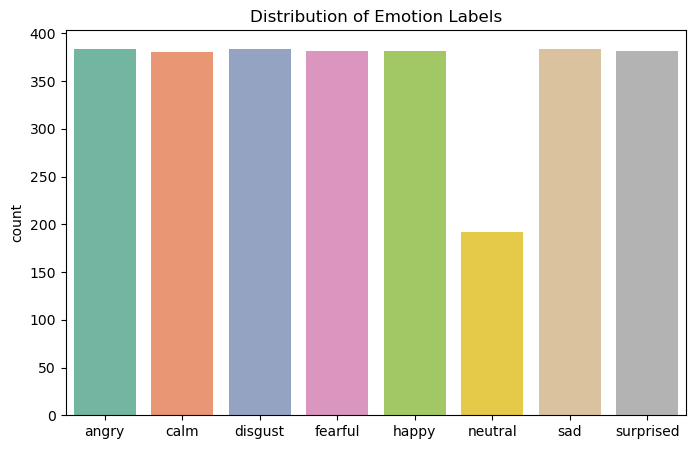

In [3]:
# Unique classes
unique_emotions, counts = np.unique(y, return_counts=True)
print("Unique Emotions:", unique_emotions)

# Plot distribution
plt.figure(figsize=(8,5))
sns.countplot(x=y, order=unique_emotions, palette="Set2")
plt.title("Distribution of Emotion Labels")
plt.show()

### Step 3: Apply Label Encoding
We use `LabelEncoder` to convert text labels (e.g., "happy") into integers (e.g., 2).

In [4]:
# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Encoded Labels Sample:", y_encoded[:10])
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded Labels Sample: [5 5 5 5 1 1 1 1 1 1]
Mapping: {'angry': np.int64(0), 'calm': np.int64(1), 'disgust': np.int64(2), 'fearful': np.int64(3), 'happy': np.int64(4), 'neutral': np.int64(5), 'sad': np.int64(6), 'surprised': np.int64(7)}


### Step 4: Apply One-Hot Encoding (Optional)
Sometimes, models work better when classes are represented as binary vectors.

In [5]:
onehot = OneHotEncoder(sparse_output=False)
y_onehot = onehot.fit_transform(y_encoded.reshape(-1,1))

print("One-Hot Encoded Shape:", y_onehot.shape)
print("Sample (first 5 rows):\n", y_onehot[:5])

One-Hot Encoded Shape: (2870, 8)
Sample (first 5 rows):
 [[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


### Step 5: Visualization of Encoded Labels

C:\Users\MSI\AppData\Local\Temp\ipykernel_25596\2971765951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_encoded, palette="viridis")


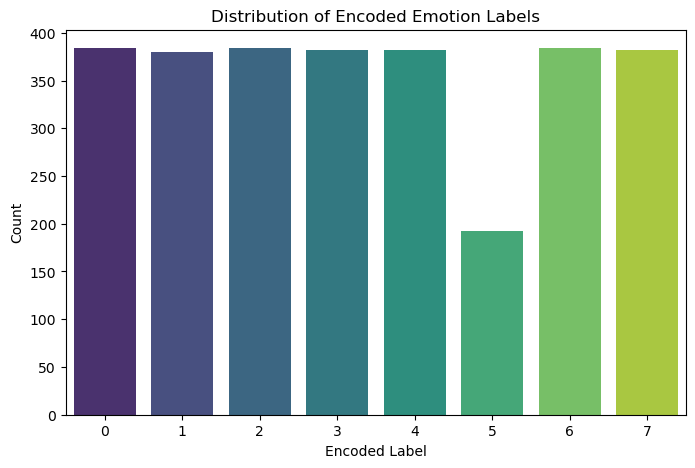

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x=y_encoded, palette="viridis")
plt.title("Distribution of Encoded Emotion Labels")
plt.xlabel("Encoded Label")
plt.ylabel("Count")
plt.show()

# ✅ Conclusion
- Original labels were strings (happy, sad, angry, etc.).  
- We successfully encoded them into numeric values using **LabelEncoder**.  
- Optionally, we also demonstrated **One-Hot Encoding**.  
- Now the labels are ready for ML model training.